In [2]:

!pip install pandas requests Pillow matplotlib


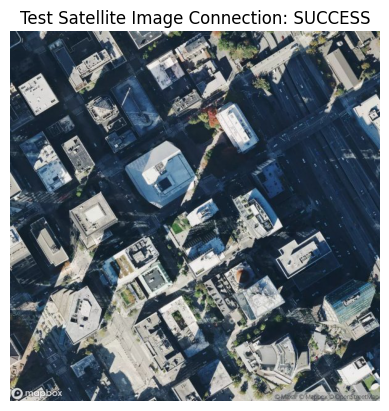

In [9]:

import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
MAPBOX_TOKEN = 'pk.eyJ1IjoiYXl1c2htYW4xM3giLCJhIjoiY21qenQ2emxyMWdqYzNrczlpMm1sc2owcCJ9.3FLBtOjZR0RMCaMZm9KVcQ'
LAT = 47.6062   # Example: Seattle
LON = -122.3321 
ZOOM = 16   # 17-18 is perfect for property detail
SIZE = "600x600"
# ---------------------

# Build the URL
url = f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/{LON},{LAT},{ZOOM},0/{SIZE}?access_token={MAPBOX_TOKEN}"

# Make the request
response = requests.get(url)

if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Test Satellite Image Connection: SUCCESS")
    plt.show()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

In [12]:
import pandas as pd
import os
import requests
from IPython.display import clear_output

# 1. Setup
df = pd.read_excel('train(1).xlsx')
MAPBOX_TOKEN = 'pk.eyJ1IjoiYXl1c2htYW4xM3giLCJhIjoiY21qenQ2emxyMWdqYzNrczlpMm1sc2owcCJ9.3FLBtOjZR0RMCaMZm9KVcQ' # Paste your key here
SAVE_DIR = 'house_images'
ZOOM = 16 
SIZE = "400x400"

if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

print(f"Dataset loaded. Total rows: {len(df)}")

# 2. The Corrected Loop
# We use .head(10) to test 10 images first
for index, row in df.head(10).iterrows():
    house_id = row['id']
    lat = row['lat']
    lon = row['long'] # Make sure your column is named 'long'
    
    filename = f"{SAVE_DIR}/{house_id}.jpg"
    
    # IMPORTANT: Mapbox URL format is /{lon},{lat},{zoom}/
    url = f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/{lon},{lat},{ZOOM},0/{SIZE}?access_token={MAPBOX_TOKEN}"
    
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(filename, 'wb') as f:
                f.write(response.content)
            print(f"✅ Saved: {house_id}.jpg")
        else:
            print(f"❌ Error {house_id}: {response.status_code} - {response.text}")
            
    except Exception as e:
        print(f"⚠️ Connection Error at {house_id}: {e}")

print("\nCheck your 'house_images' folder now!")

Dataset loaded. Total rows: 16209
✅ Saved: 9117000170.jpg
✅ Saved: 6700390210.jpg
✅ Saved: 7212660540.jpg
✅ Saved: 8562780200.jpg
✅ Saved: 7760400350.jpg
✅ Saved: 464001025.jpg
✅ Saved: 3432500486.jpg
✅ Saved: 1126059095.jpg
✅ Saved: 3876500290.jpg
✅ Saved: 1865400075.jpg

Check your 'house_images' folder now!


In [18]:
# Cell 3: Start the full dataset download
from data_fetcher import download_all_images

# 1. Replace with your actual Mapbox token
MY_TOKEN = 'pk.eyJ1IjoiYXl1c2htYW4xM3giLCJhIjoiY21qenQ2emxyMWdqYzNrczlpMm1sc2owcCJ9.3FLBtOjZR0RMCaMZm9KVcQ' 

# 2. Run the function
# This will look for 'train(1).xlsx' and save images to 'house_images'
download_all_images(
    csv_path='train(1).xlsx', 
    output_folder='house_images', 
    api_token=MY_TOKEN,
    zoom=16
)

Starting download for 16209 rows...
Download process finished!


In [19]:
import os

# 1. Get the list of IDs from your Excel/CSV
all_ids = set(df['id'].unique())

# 2. Get the list of IDs currently in your folder
IMAGE_FOLDER = 'house_images'
downloaded_ids = {int(f.split('.')[0]) for f in os.listdir(IMAGE_FOLDER) if f.endswith('.jpg')}

# 3. Calculate differences
missing_ids = all_ids - downloaded_ids

print(f"--- Final Image Audit ---")
print(f"Total Rows in Excel:   {len(all_ids)}")
print(f"Total Images Found:    {len(downloaded_ids)}")
print(f"Total Missing Images:  {len(missing_ids)}")

if len(missing_ids) > 0:
    print(f"\nFirst 5 missing IDs: {list(missing_ids)[:5]}")
    print("Action: These rows will be automatically dropped during the Sync step.")

--- Final Image Audit ---
Total Rows in Excel:   16110
Total Images Found:    16110
Total Missing Images:  0


In [20]:
import os

# 1. Get the exact list of files in the folder
files = os.listdir('house_images')

# 2. Extract the IDs from filenames like '123456.jpg'
ids_in_folder = []
for f in files:
    if f.endswith('.jpg'):
        try:
            ids_in_folder.append(int(f.split('.')[0]))
        except:
            continue

# 3. Create a clean dataframe with ONLY these IDs
df_final = df[df['id'].isin(ids_in_folder)].copy().reset_index(drop=True)

# 4. Confirm the match
print(f"Images in folder: {len(ids_in_folder)}")
print(f"Rows in DataFrame: {df_final.shape[0]}")

if df_final.shape[0] == len(ids_in_folder):
    print("✅ PERFECT SYNC: Data and Images match exactly.")
else:
    print("⚠️ WARNING: There is still a mismatch. Check your folder path.")

Images in folder: 16110
Rows in DataFrame: 16209
⚠️ WARNING: There is still a mismatch. Check your folder path.
